# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.129141e+01     7.740559e+00
 * time: 0.004104137420654297
     1     2.635512e+01     6.057304e+00
 * time: 0.012506961822509766
     2     1.930201e+01     4.972438e+00
 * time: 0.032575130462646484
     3     1.289084e+01     1.129070e+00
 * time: 0.056136131286621094
     4     1.203767e+01     1.640580e+00
 * time: 0.07212710380554199
     5     1.159881e+01     1.261947e+00
 * time: 0.08776593208312988
     6     1.119610e+01     1.131392e+00
 * time: 0.10357403755187988
     7     1.082141e+01     8.894136e-01
 * time: 0.11948895454406738
     8     1.049994e+01     6.596951e-01
 * time: 0.13591599464416504
     9     1.029477e+01     4.639097e-01
 * time: 0.15229511260986328
    10     1.017423e+01     5.247781e-01
 * time: 0.16843605041503906
    11     1.013488e+01     3.185293e-01
 * time: 0.18504810333251953
    12     1.011799e+01     2.964325e-01
 * time: 0.20149803161621094
    13     1.010362e+01     1.906528e-01
 * t

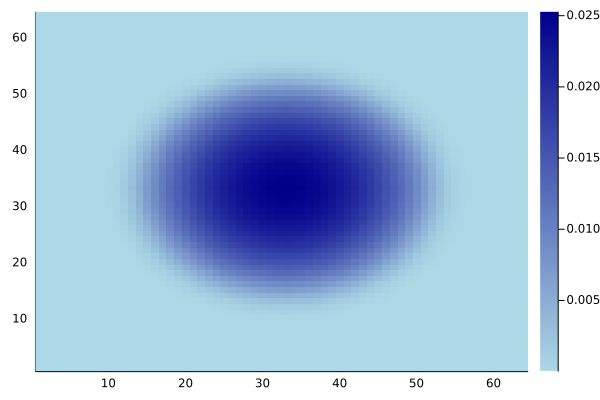

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)